<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04


## Problema 01

<img src="https://cdni.iconscout.com/illustration/free/thumb/free-sales-team-illustration-download-in-svg-png-gif-file-formats--business-pack-illustrations-1730192.png" width = "300" align="center"/>


El conjunto de datos, denominado `company_sales_data.csv`, recoge las ventas mensuales de distintos productos de una empresa, ofreciendo una visión general de las unidades vendidas y los beneficios generados. Entre los productos incluidos se encuentran cremas faciales, jabones de baño y artículos para el cuidado capilar. Este conjunto de datos es útil para analizar el rendimiento de ventas y el comportamiento del mercado a lo largo del tiempo.

### Descripción de los Datos:

1. **month_number**: Número correspondiente al mes del año (1 para enero, 2 para febrero, etc.).
2. **facecream**: Cantidad de unidades de crema facial vendidas durante el mes.
3. **facewash**: Cantidad de unidades de limpiador facial vendidas durante el mes.
4. **toothpaste**: Cantidad de unidades de pasta de dientes vendidas durante el mes.
5. **bathingsoap**: Cantidad de unidades de jabón de baño vendidas durante el mes.
6. **shampoo**: Cantidad de unidades de champú vendidas durante el mes.
7. **moisturizer**: Cantidad de unidades de crema hidratante vendidas durante el mes.
8. **total_units**: Total de unidades vendidas de todos los productos en un mes dado.
9. **total_profit**: Ganancia total obtenida por la venta de todos los productos durante el mes, expresada en la moneda correspondiente.



In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [12]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El **objetivo principal** es extraer la mayor cantidad de información posible de este conjunto de datos. Para lograrlo, se deben abordar las siguientes tareas. Para cada pregunta, deberá obtener una conclusión basada en los gráficos generados. Al finalizar todas las preguntas, se espera una conclusión general del análisis.

> **Nota:** Se permite el uso de las librerías Matplotlib o Seaborn para la visualización y análisis de los datos.




1. Lea la columna **`total_profit`** correspondiente a todos los meses y represente los datos utilizando un gráfico lineal y un gráfico de dispersión.


Text(0.5, 1.0, 'Ganancia total por mes')

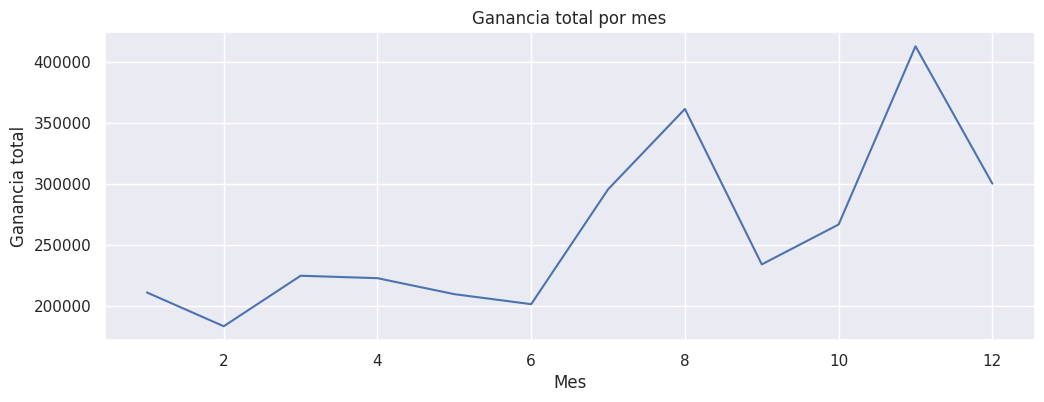

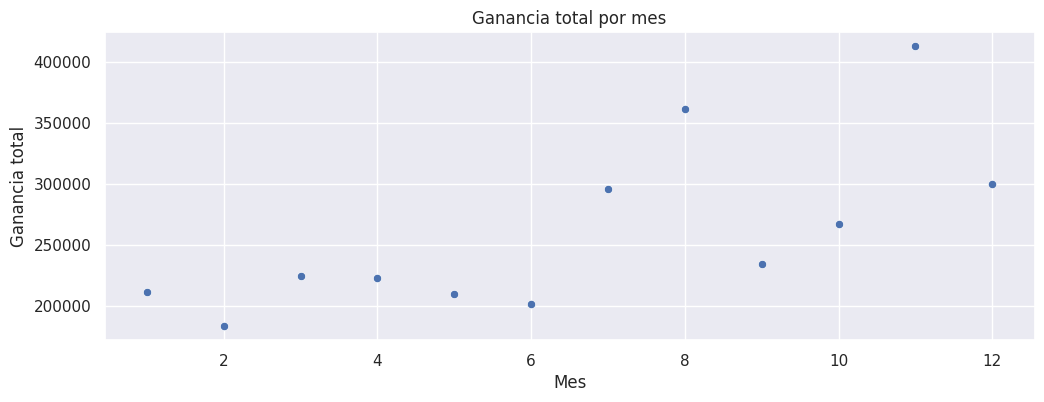

In [25]:

#Gráfico de línea.
plt.figure(figsize=(12,4))
sns.lineplot(
    data = df,
    x='month_number',
    y='total_profit'
)
#Cambiando nombres
plt.xlabel('Mes')
plt.ylabel('Ganancia total')
plt.title('Ganancia total por mes')

#Gráfico de dispersión.
plt.figure(figsize=(12,4))
sns.scatterplot(
    data = df,
    x='month_number',
    y='total_profit'
)
#Cambiando nombres
plt.xlabel('Mes')
plt.ylabel('Ganancia total')
plt.title('Ganancia total por mes')

Vemos que el mes de más ventas fue el número 11, mientras que el de menor fue el mes 2.

2. Lea los datos de ventas de todos los productos y represéntelos en un gráfico de líneas múltiples.


Text(0.5, 1.0, 'Unidades de Producto Vendidas Por Mes')

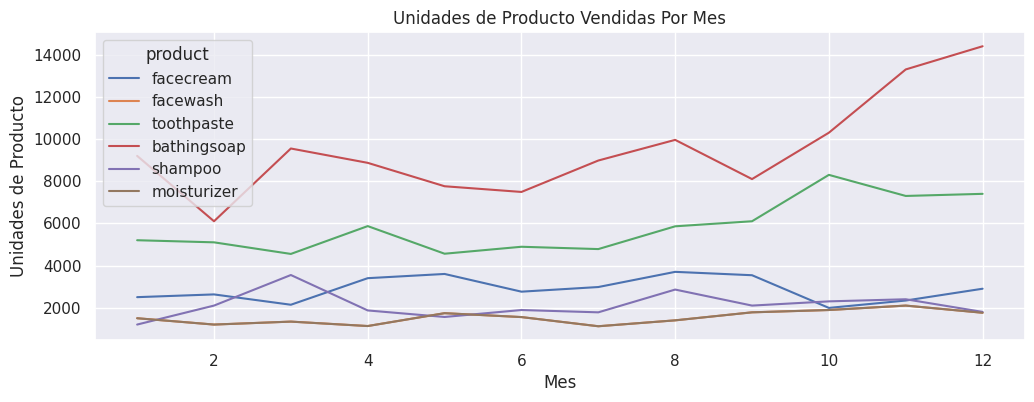

In [37]:
#HAcer un melt
df_ventas = df.loc[:,['month_number','facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']]
df_ventas = df_ventas.melt(
    id_vars=['month_number'],
    value_vars=['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer'],
    var_name='product',
    value_name='units_sold'
)
plt.figure(figsize=(12,4))
sns.lineplot(
    data=df_ventas,
    x='month_number',
    y='units_sold',
    hue='product'
)
plt.xlabel('Mes')
plt.ylabel('Unidades de Producto')
plt.title('Unidades de Producto Vendidas Por Mes')

Vemos que el shampoo es el producto que más se vendió por mes.

3. Lea los datos de ventas de **`facecream`** y **`facewash`** y represéntelos utilizando un gráfico de barras.

Text(0.5, 1.0, 'Grafico Unidades de Facecream y Facewash Vendidas')

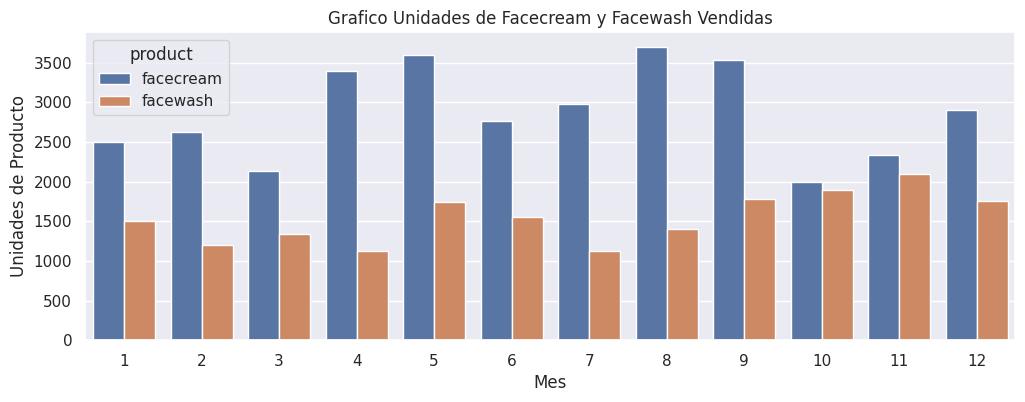

In [36]:
df_facecream_facewash = df.loc[:,['month_number','facecream','facewash']]
df_facecream_facewash = df_facecream_facewash.melt(
    id_vars=['month_number'],
    value_vars=['facecream', 'facewash'],
    var_name='product',
    value_name='units_sold'
)
plt.figure(figsize=(12,4))
sns.barplot(
    data=df_facecream_facewash,
    x='month_number',
    y='units_sold',
    hue='product'
)
plt.xlabel('Mes')
plt.ylabel('Unidades de Producto')
plt.title('Grafico Unidades de Facecream y Facewash Vendidas')

Se vendió más facecream que facewash en cada mes.

4. Lea los datos de ventas de todos los productos y represéntelos utilizando un gráfico de caja (*box-plot*).


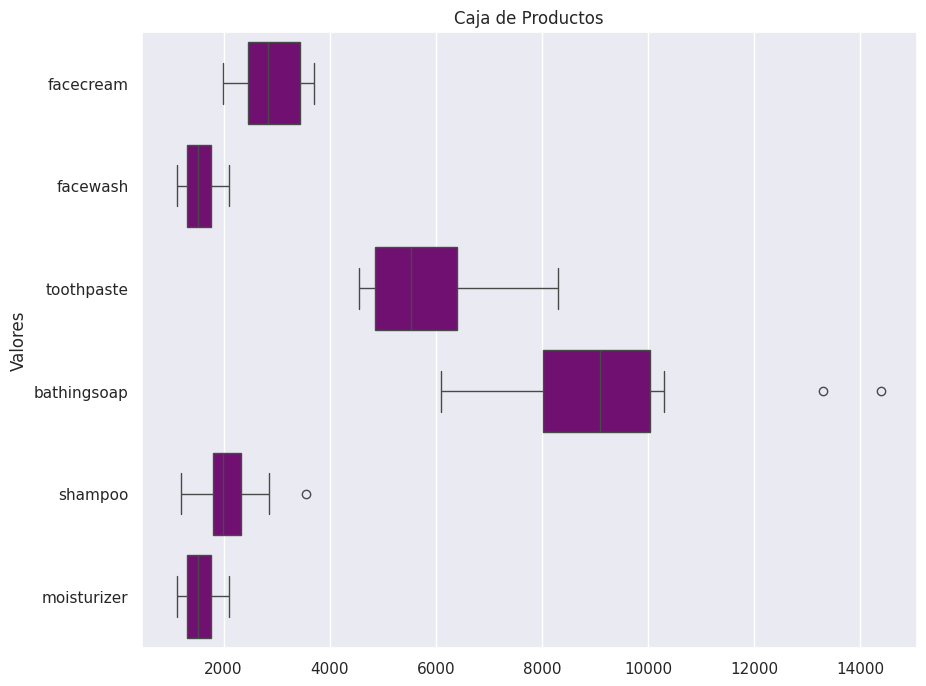

In [40]:
#Quitar los datos que no queremos:
df_plotbox = df.drop(['month_number'],axis=1).drop(['total_units'],axis = 1).drop(['total_profit'],axis=1)
sns.boxplot(data=df_plotbox,color="purple",orient="h")

#Personalizar el gráfico
plt.xlabel('')
plt.ylabel('Valores')
plt.title('Caja de Productos')

#Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=0)

#Mostrar el gráfico
plt.show()


5. Calcule las ventas totales del año pasado para cada producto y represéntelas utilizando un gráfico circular.

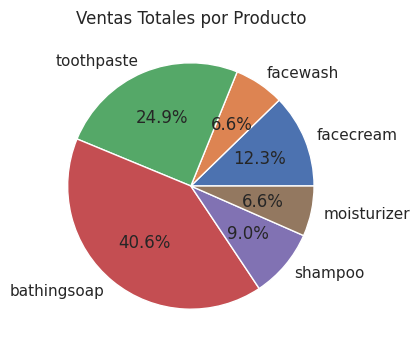

In [41]:
sales_sum = df.drop(['month_number','total_units','total_profit'],axis=1).sum()
plt.figure(figsize=(12,4))
plt.pie(sales_sum,labels=sales_sum.index,autopct='%1.1f%%')
plt.title('Ventas Totales por Producto')
plt.show()

El bathing soap es el producto con mayor cantidad de ventas del año.
